# 1장 파이썬 입문

## 1.0 초기 설정

In [1]:
#처음할때만 실행해주고 다음부턴 안해줌
"""
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib
"""

'\n!sudo apt-get install -y fonts-nanum* | tail -n 1\n!sudo fc-cache -fv\n!rm -rf ~/.cache/matplotlib\n'

In [2]:
# 라이브러리 임포트,폰트 사용안함 문제없음

%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

# 파이토치 관련 라이브러리
import torch

c:\Users\white\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1.2 컨테이너 타입 변수에 주의

In [3]:
# 넘파이 배열 x를 정의
x = np.array([5,7,9])

#변수 y에 x를 대입
y=x
#<- 이렇게 설정하면 x,y 같이 변경됨
print(x)
print(y)

x[1]=-1
print(x)
print(y)

#두 변수 사이 = 를 사용하면 둘다 바뀔수 있다는것을 알고 가야함 둘다 변하는 걸 원치 않을 경우 새로 생성해서 해야됨



[5 7 9]
[5 7 9]
[ 5 -1  9]
[ 5 -1  9]


In [4]:
# y도 동시에 변하면 안되는 경우는, 대입 시 copy 함수를 이용함
x = np.array([5, 7, 9])
y = x.copy()

# x의 특정 요소 값이 변해도, y에는 영향이 없음
x[1] = -1
print(x)
print(y)

[ 5 -1  9]
[5 7 9]


### 텐서와 넘파이 변수 간 에러

In [5]:
import torch

# x1: shape=[5]가 되는 모든 값이 1인 텐서
x1 = torch.ones(5)

# 결과 확인
print(x1)

# x2: x1로부터 생성한 넘파이 배열
x2 = x1.data.numpy()

# 결과 확인
print(x2)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [6]:
# x1의 값을 변경
x1[1] = -1

# x2의 값도 같이 변함
print(x1)
print(x2)



tensor([ 1., -1.,  1.,  1.,  1.])
[ 1. -1.  1.  1.  1.]


In [7]:
# 안전한 방법

# x1: 텐서
x1 = torch.ones(5)

# x2: x1를 copy한 넘파이
x2 = x1.data.numpy().copy()

x1[1] = -1

# 결과 확인
print(x1)
print(x2)

tensor([ 1., -1.,  1.,  1.,  1.])
[1. 1. 1. 1. 1.]


numpy, torch를 다룰 때 똑같은 것을 사용할떄는 copy를 통해 복사한다.

## 1.3 합성 함수를 파이썬으로 구현하기

In [8]:
# f(x)=2x^2+2 의 함수

def f(x):
    return 2*x**2+2


In [9]:
# 넘파이 배열로 x를 정의

x = np.arange(-2, 2.1, 0.25) # -2 부터 2.1 까지 0.25씩 증가하는 numpy 배열
print(x)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


In [10]:
y=f(x)
print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


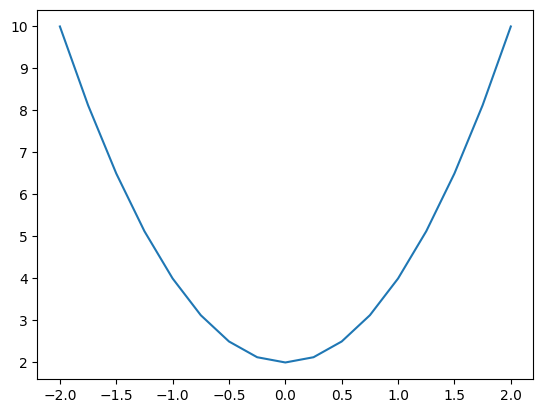

In [11]:
plt.plot(x,y)
plt.show()

In [12]:
# 세 가지 기본 함수의 정의

def f1(x):
    return(x**2)

def f2(x):
    return(x*2)

def f3(x):
    return(x+2)

# 합성 함수 만들기

x1 = f1(x)
x2 = f2(x1)
y = f3(x2)

In [13]:
# 합성 함수 값 확인

print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


## 1.4 미분과 파이썬의 수치 미분 구현하기

함수를 수치 미분하는 함수``diff``를 정의한다.
수치 미분의 계산에는, 미분의 정의로부터 다음과 같은 근사식 $f'(x) = \dfrac{f(x+h)-f(x-h)}{2h}$ 를 사용한다.

수치미분은 작은 h 값을 넣어 미분한 값의 근사하도록 구하는 미분

In [14]:
# 함수를 미분하는 함수 fdiff 의 정의

def fdiff(f):
    # 함수 f를 인수로 미분한 결과 함수를 diff로 정의
    def diff(x):
        h = 1e-6
        return (f(x+h) - f(x-h)) / (2*h)

    # fdiff 의 반환은 미분한 결과 함수 diff
    return diff

In [15]:
#2차 함수의 수치 미분

# f의 미분 결과 함수 diff 
# f = 2x^2+2
diff = fdiff(f)

#중복 함수의 경우 함수 안에 함수를 하나의 변수로 여기고 그 함수안에서만 사용이 가능함
#class 에서 함수를 실행할때 class명.함수명 하는거 생각하면 됨.

#미분 결과를 계산하고 y_dash에 대입
y_dash = diff(x)

#result
print(y_dash)


[-8. -7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.]


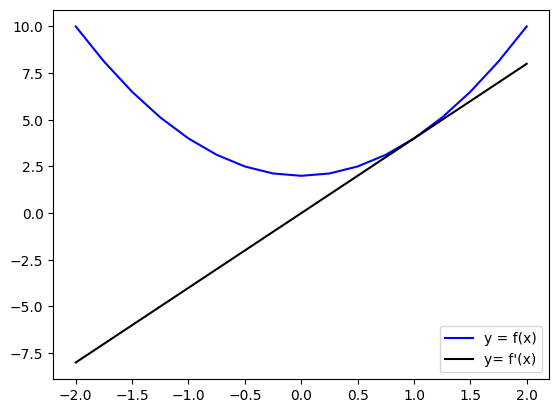

In [16]:
# 결과 그래프 출력

plt.plot(x,y,label=r'y = f(x)', c= 'b')
plt.plot(x,y_dash,label=r"y= f'(x)",c='k')
plt.legend()
plt.show()

시그모이드 함수 $g(x) = \dfrac{1}{1 + \exp(-x)}$에 대해 같은 계산을 해본다.

In [17]:
#시그모이드 함수

def g(x):
    return 1/(1+np.exp(-x))


In [18]:
#시그 모이드 함수 계산

y=g(x)
print(y)

[0.11920292 0.1480472  0.18242552 0.22270014 0.26894142 0.3208213
 0.37754067 0.4378235  0.5        0.5621765  0.62245933 0.6791787
 0.73105858 0.77729986 0.81757448 0.8519528  0.88079708]


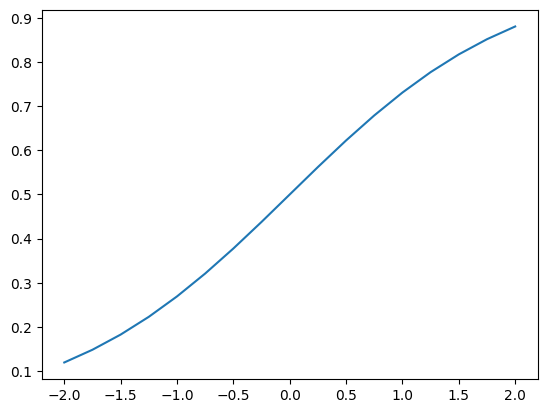

In [19]:
# 그래프 출력

plt.plot(x, y)
plt.show()

In [20]:
# 시그모이드 함수의 수치 미분
#앞에서와 같은 코드에 함수만g로 바꾼거

diff = fdiff(g)

y_dash = diff(x)

print(y_dash)

[0.10499359 0.12612923 0.14914645 0.17310479 0.19661193 0.21789499
 0.23500371 0.24613408 0.25       0.24613408 0.23500371 0.21789499
 0.19661193 0.17310479 0.14914645 0.12612923 0.10499359]


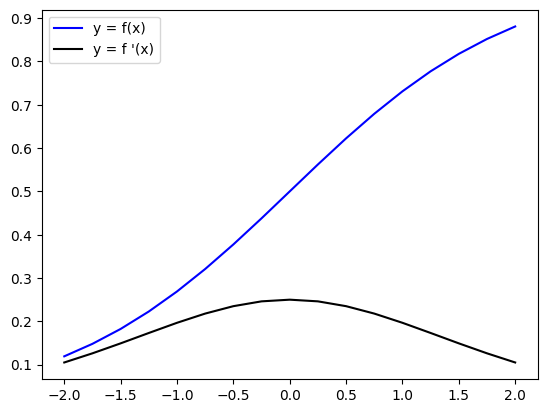

In [21]:
# 결과 그래프 출력

plt.plot(x, y, label=r'y = f(x)', c='b')
plt.plot(x, y_dash, label=r"y = f '(x)", c='k')
plt.legend()
plt.show()

시그모이드를 미분했을때 점 0 에서 0.25로 최대값을 취하는 그래프가 나옴

## 1.5 커스텀 클래스 정의하기

In [22]:
# 원을 그리기 위해 필요한 라이브러리
import matplotlib.patches as patches

In [23]:
# Point 클래스 정의
class Point:
    #인스턴스 생성 시에 두 개의 인수 x와 y를 가짐
    def __init__(self,x,y):
        #인스턴스 속성 x에 첫번째 인수를 할당
        self.x = x
        #인스턴스 속성 y에 첫번째 인수를 할당
        self.y=y

    # draw 함수 정의(인수없음)
    def draw(self):
        #(x, y)에 점을 그림
        plt.plot(self.x,self.y,marker='o',markersize=10,c='k')
        

In [24]:
#Point 클래스로 인스턴스 변수 p1과 p2 생성

p1 = Point(2,3)
p2 = Point(-1,-2)

In [25]:
# p1과 p2 의 속성 x,y

print(p1.x,p1.y)
print(p2.x,p2.y)


2 3
-1 -2


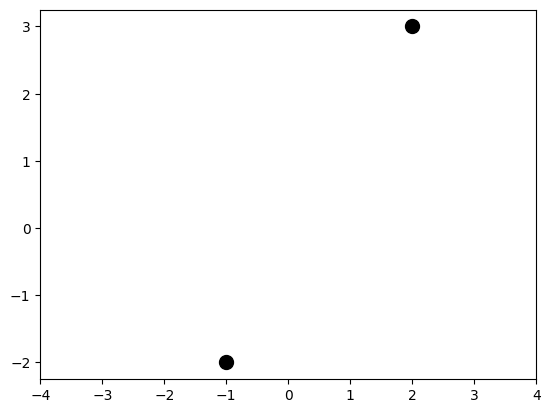

In [26]:
# p1 과 p2 의 draw 함수를 호출하고, 두 개의 점을 출력함

p1.draw()
p2.draw()
plt.xlim(-4,4)
plt.show()

In [27]:
# Point의 자식 클래스 Circle 정의 1

class Circle1(Point):
    # Circle은 인스턴스 생성 시에 인수 x, y, r을 가짐
    def __init__(self, x, y, r):
        # x와 y는 부모 클래스의 속성으로 설정
        super().__init__(x, y)
        # r은 Circle의 속성으로 설정
        self.r = r
     
    # 이 단계에서 draw 함수는 정의하지 않음

In [28]:
# Circle1 클래스에서 인스턴스 변수 c1_1을 생성
c1_1 = Circle1(1, 0, 2)

In [29]:
# c1_1의 속성 확인
print(c1_1.x, c1_1.y, c1_1.r)

1 0 2


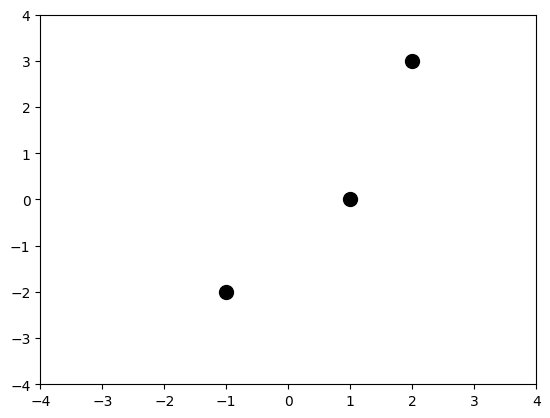

In [30]:
# p1, p2, c1_1의 각 draw 함수를 호출

ax = plt.subplot()
p1.draw()
p2.draw()
c1_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

위와 다르게 아래 코드에선 draw 함수를 설정했기 때문에 그 함수가 실행된다.

In [31]:
# Point의 자식 클래스 Circle의 정의 2

class Circle2(Point):
    # Circle은 인스턴스 생성 시에 인수x, y, r을 가짐
    def __init__(self, x, y, r):
        # x와 y는 부모 클래스의 속성으로 설정
        super().__init__(x, y)
        # r은 Circle의 속성으로 설정
        self.r = r
     
    # draw 함수는 자식 클래스만 따로 원을 그림
    def draw(self):
        # 원 그리기
        c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc='b', ec='k')
        ax.add_patch(c)

In [32]:
# Circle2 클래스로부터 인스턴스 변수 c2_1을 생성
c2_1 = Circle2(1, 0, 2)

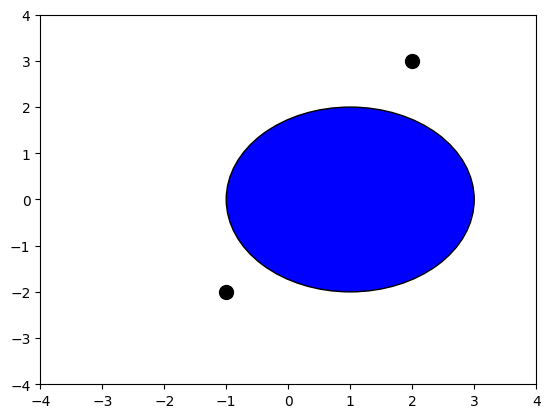

In [33]:
# p1, p2, c2_1의 각 draw 함수를 호출
# Circle2 의 draw가 실행됨

ax = plt.subplot()
p1.draw()
p2.draw()
c2_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

Point 의 draw 함수를 실행하는 코드

In [37]:
# Point의 자식 클래스 Circle의 정의 3

class Circle3(Point):
    # Circle은 인스턴스 생성 시에 인수 x, y, r을 가짐
    def __init__(self, x, y, r):
        # x와 y는 부모 클래스의 속성으로 설정
        super().__init__(x, y)
        # r은 Circle의 속성으로 설정
        self.r = r
     
    # Circle의 draw 함수는 부모의 함수를 호출한 다음, 원 그리기를 독자적으로 수행함
    def draw(self):
        # 부모 클래스의 draw 함수 호출
        super().draw()
        
        # 원 그리기, 원은 가장 마지막 배경으로 그려짐
        c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc='b', ec='k')
        ax.add_patch(c)



In [38]:
# Circle3 클래스로부터 인스턴스 변수 c3_1를 생성
c3_1 = Circle3(1, 0, 2)

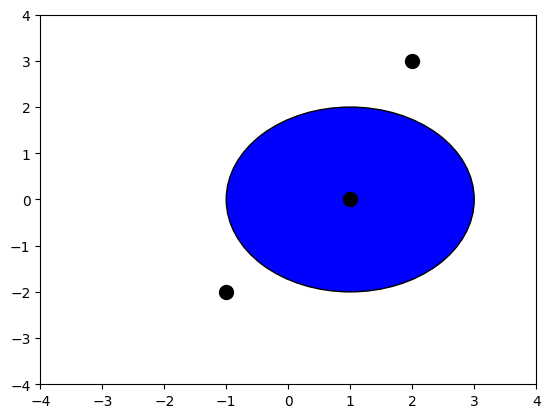

In [39]:
# p1, p2, c3_1의 각 draw 함수를 호출

ax = plt.subplot()
p1.draw()
p2.draw()
c3_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

## 1.6 인스턴스를 함수로 사용하는 방법

In [40]:
# 함수 클래스 H의 정의
#class 는 H.함수명(call이 가지는 변수) 형태로 사용되면 실행이 됨


class H:
    def __call__(self, x):
        return 2*x**2 + 2

In [42]:
# h가 함수로 동작하는지 확인

# 넘파이 배열 x를 정의
x = np.arange(-2, 2.1, 0.25)
print(x)

# H 클래스의 인스턴스로 h를 생성
h = H() 

# 함수 h 호출
y = h(x)
print(y)
#기본 x출력과 h(x)를 실행함으로써 call의 return값을 y에 저장후 출력

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]
[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


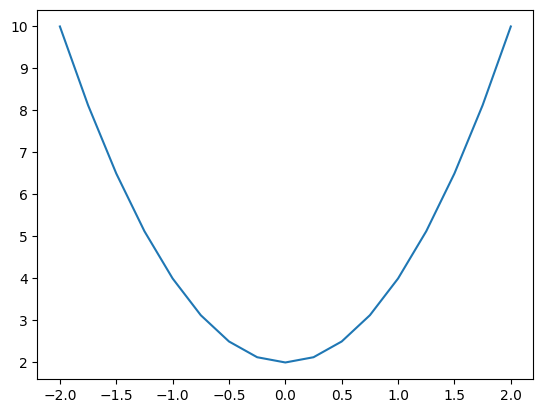

In [43]:
# 그래프 출력

plt.plot(x, y)
plt.show()